#The CIFAR-10 Data
**the CIFAR-10 dataset contains `60,000` color images of `32 x 32` pixels in `3` channels divided into `10` classes. Each class contains `6,000` images. The training set contains `50,000` images, while the test sets provides `10,000` images. This image taken from the CIFAR repository ( https://www.cs.toronto.edu/~kriz/cifar.html ). This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.**

#**IMPORTS**

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout ,Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report , confusion_matrix

In [17]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

In [18]:
x_train.shape

(50000, 32, 32, 3)

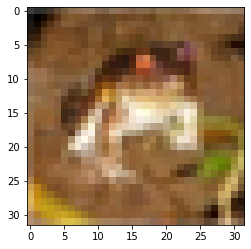

In [19]:
plt.imshow(x_train[0])

##**Scale img array**

In [20]:
x_train.max(),x_train.min()

(255, 0)

In [21]:
x_scaled_train = x_train/255
x_scaled_test = x_test/255

x_scaled_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

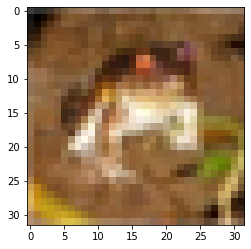

In [22]:
plt.imshow(x_scaled_train[0])

#**Transform the Labels to Categorical form**

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)
y_cat_train.shape, y_cat_test.shape

((50000, 10), (10000, 10))

In [25]:
y_cat_train[0] , y_train[0] 


(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([6], dtype=uint8))

#**Build The Network**

In [47]:
model = Sequential()


# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))


# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 64)       

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

##**Fit the Model**

In [50]:
model.fit(x_scaled_train,y_cat_train,batch_size=32,epochs=100,validation_data=(x_scaled_test,y_cat_test ), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 235s 150ms/step - loss: 1.5119 - accuracy: 0.4507 - val_loss: 1.1498 - val_accuracy: 0.5926
Epoch 2/100
1563/1563 [==============================] - 234s 150ms/step - loss: 1.1193 - accuracy: 0.6015 - val_loss: 0.9453 - val_accuracy: 0.6650
Epoch 3/100
1563/1563 [==============================] - 234s 150ms/step - loss: 0.9646 - accuracy: 0.6583 - val_loss: 0.8366 - val_accuracy: 0.7067
Epoch 4/100
1563/1563 [==============================] - 234s 150ms/step - loss: 0.8828 - accuracy: 0.6900 - val_loss: 0.8146 - val_accuracy: 0.7158
Epoch 5/100
1563/1563 [==============================] - 234s 150ms/step - loss: 0.8154 - accuracy: 0.7143 - val_loss: 0.7336 - val_accuracy: 0.7484
Epoch 6/100
1563/1563 [==============================] - 234s 150ms/step - loss: 0.7658 - accuracy: 0.7324 - val_loss: 0.7085 - val_accuracy: 0.7557
Epoch 7/100
1563/1563 [==============================] - 234s 150ms/step - loss: 0.7326 - accuracy: 0.7408

#**Model Evaluation**

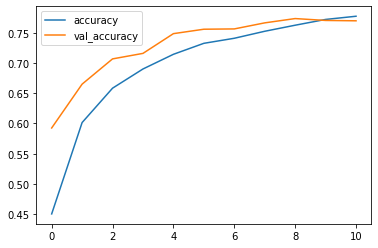

In [51]:
loss = pd.DataFrame(model.history.history)
loss[['accuracy','val_accuracy']].plot()

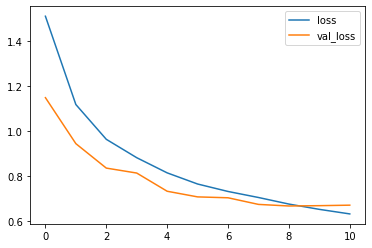

In [52]:
loss[['loss','val_loss']].plot()

In [59]:

print(model.evaluate(x_test,y_cat_test,verbose=0))

[173.62184143066406, 0.5234000086784363]


In [54]:

prediction=model.predict(x_scaled_test)

prediction=np.argmax(prediction, axis=1)
y_true = np.argmax(y_cat_test,axis=1)

print(classification_report(y_true,prediction))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1000
           1       0.93      0.85      0.89      1000
           2       0.66      0.67      0.66      1000
           3       0.64      0.57      0.60      1000
           4       0.70      0.77      0.73      1000
           5       0.74      0.62      0.68      1000
           6       0.68      0.91      0.78      1000
           7       0.84      0.81      0.82      1000
           8       0.88      0.86      0.87      1000
           9       0.86      0.87      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



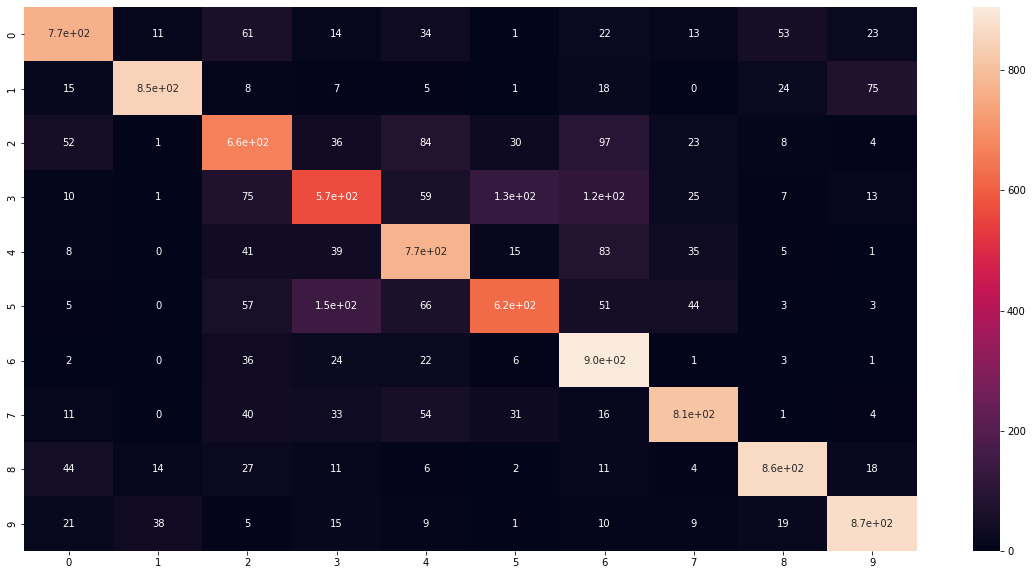

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_true,prediction), annot=True)

#**Check the predictions**

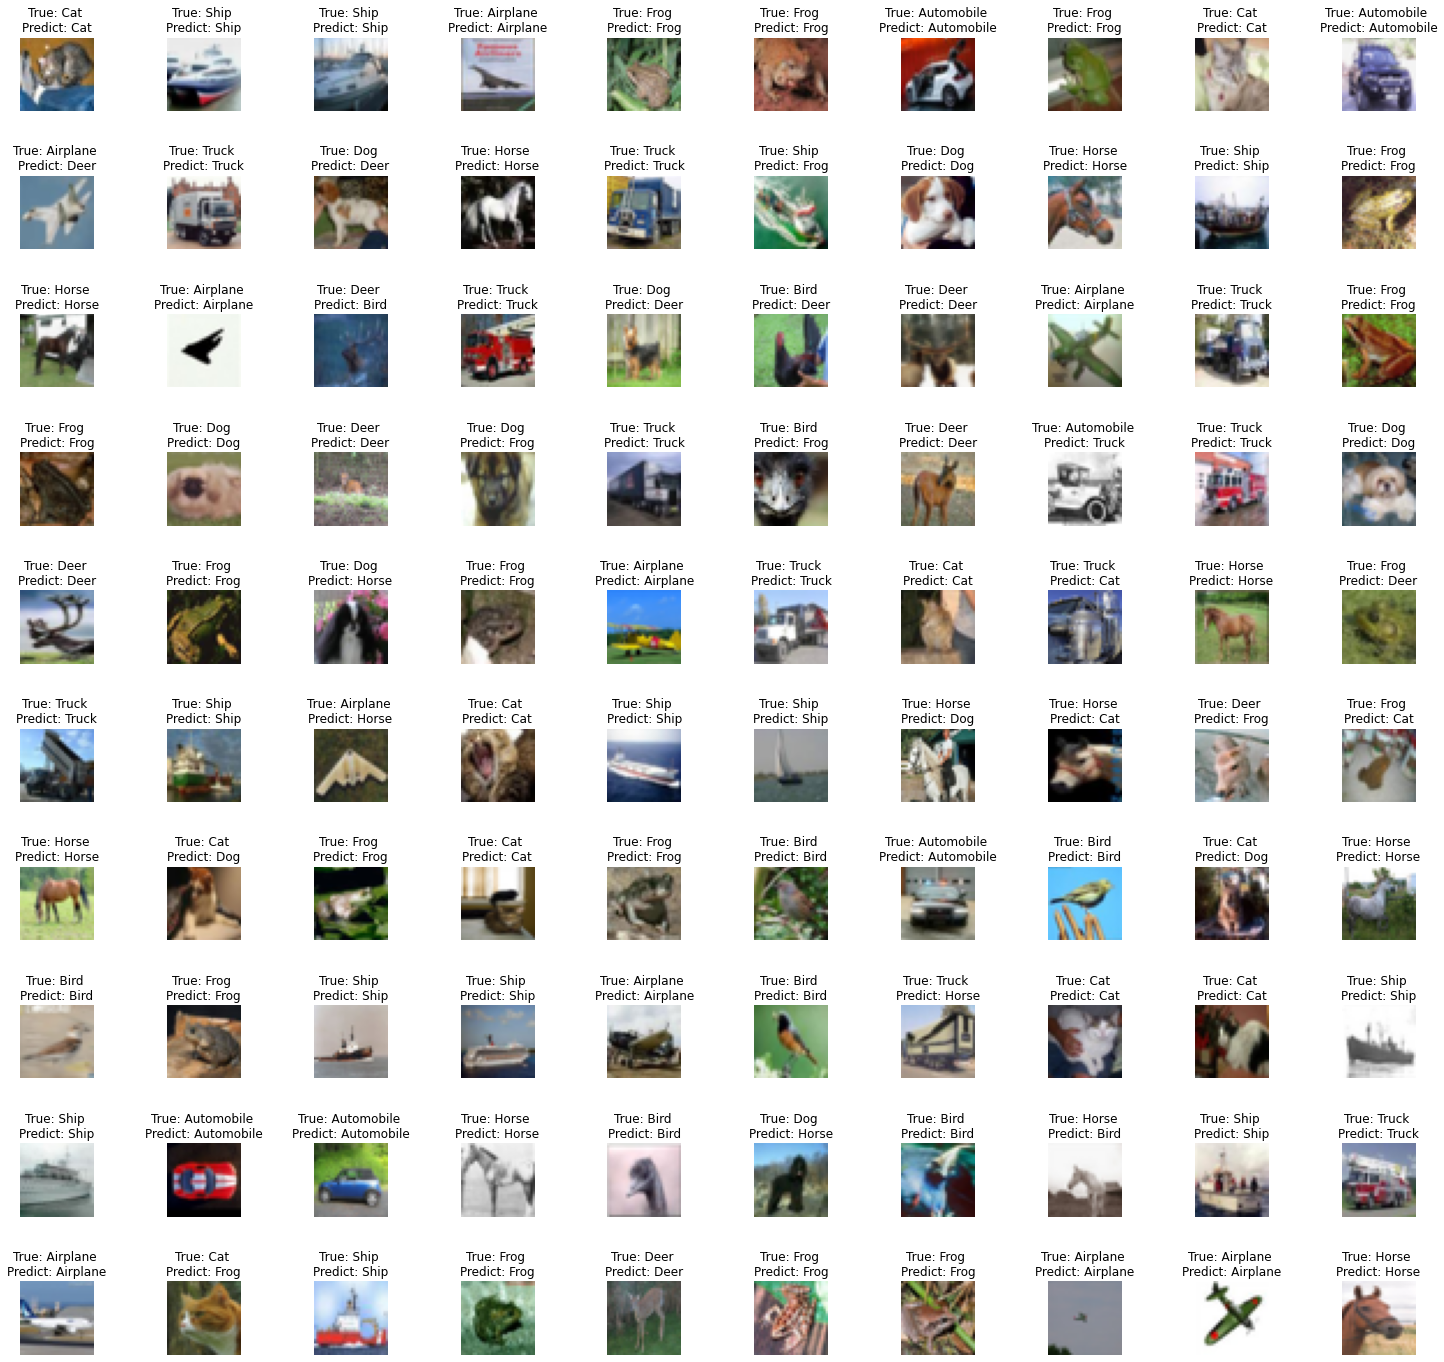

In [68]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(25,25))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[y_true[i]], labels[prediction[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)